# Fashion images classification using an artificial neural network
The main idea with this AI is classify different images with its respective class: 
0. 	T-shirt/top
1. 	Trouser
2. 	Pullover
3. 	Dress
4. 	Coat
5. 	Sandal
6. 	Shirt
7. 	Sneaker
8. 	Bag
9. 	Ankle boot
. There are 60000 images in training dataset and 10000 testing data set

## Importing libraries and dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

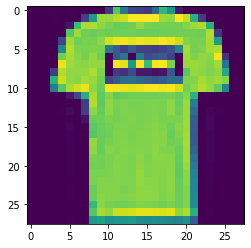

In [3]:
plt.imshow(x_train_full[1])

In [4]:
y_train_full[1] #Class T-shirt/top

0

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"
               , "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train_full[1]]

'T-shirt/top'

## Normalizing data

In [7]:
x_train_n = x_train_full / x_train_full.max().astype(np.float64)
x_test_n = x_test / x_test.max().astype(np.float64)

## Training, validating and testing data split

In [8]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

## Setting the seed

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

## Sequential model

In [10]:
model = keras.models.Sequential() #Initialize ANN model
model.add(keras.layers.Flatten(input_shape = [28, 28])) #Imput layer 28x28 pixels (images)
model.add(keras.layers.Dense(300, activation = "relu")) #First hidden layer size:300 with activation function:relu
model.add(keras.layers.Dense(100, activation = "relu")) #Second hidden layer size:100 with activation function:relu
model.add(keras.layers.Dense(10, activation = "softmax")) #Output layer with 10 options and using softmax

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Plotting model

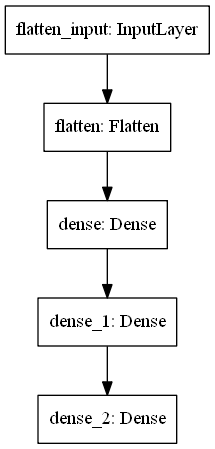

In [12]:
#import pydot
keras.utils.plot_model(model)

In [13]:
#Obtaining weights and bias
weights, bias = model.layers[1].get_weights()

In [14]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compiling and training the model

In [17]:
model.compile(loss = "sparse_categorical_crossentropy", #In case binary situation (binary_categorical_crossentropy)
             optimizer = "sgd", #Stochastic gradient descent
             metrics = ["accuracy"]) #In this case, I need just calculate accuracy

In [18]:
model_history = model.fit(x_train, y_train, epochs = 30, batch_size = 16, validation_data = (x_valid, y_valid))

Epoch 1/30
3438/3438 [==============================] - 10s 3ms/step - loss: 0.8542 - accuracy: 0.7217 - val_loss: 0.4910 - val_accuracy: 0.8282
Epoch 2/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.4582 - accuracy: 0.8390 - val_loss: 0.3886 - val_accuracy: 0.8668
Epoch 3/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.4060 - accuracy: 0.8551 - val_loss: 0.4467 - val_accuracy: 0.8332
Epoch 4/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.3783 - accuracy: 0.8641 - val_loss: 0.3523 - val_accuracy: 0.8748
Epoch 5/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.3621 - accuracy: 0.8692 - val_loss: 0.3377 - val_accuracy: 0.8756
Epoch 6/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.3316 - accuracy: 0.8793 - val_loss: 0.3347 - val_accuracy: 0.8824
Epoch 7/30
3438/3438 [==============================] - 7s 2ms/step - loss: 0.3218 - accuracy: 0.8851 - val_loss: 0.3294 - val_accuracy

In [19]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 3438}

In [20]:
model_history.history

{'loss': [0.6247153878211975,
  0.44142982363700867,
  0.3982390761375427,
  0.3709219694137573,
  0.35171791911125183,
  0.33276715874671936,
  0.32035842537879944,
  0.30854666233062744,
  0.29725220799446106,
  0.28839555382728577,
  0.2804527282714844,
  0.2715354859828949,
  0.26347967982292175,
  0.25763338804244995,
  0.25044700503349304,
  0.24357831478118896,
  0.23877747356891632,
  0.232452392578125,
  0.22720028460025787,
  0.21986177563667297,
  0.2156694531440735,
  0.21019990742206573,
  0.20665335655212402,
  0.201105996966362,
  0.19616049528121948,
  0.19209814071655273,
  0.18783751130104065,
  0.1838429868221283,
  0.17908889055252075,
  0.17589595913887024],
 'accuracy': [0.7891636490821838,
  0.8442363739013672,
  0.8577272891998291,
  0.8676000237464905,
  0.8740363717079163,
  0.8796363472938538,
  0.885200023651123,
  0.8876181840896606,
  0.8923636078834534,
  0.895618200302124,
  0.8984181880950928,
  0.9006909132003784,
  0.903109073638916,
  0.9058545231819

## Plotting accuracy vs epochs

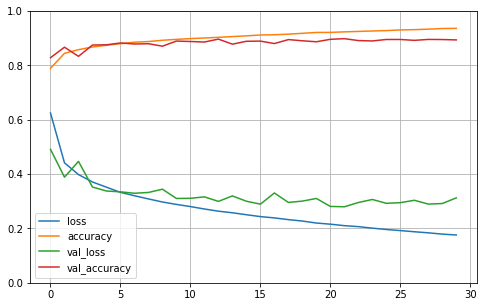

In [21]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


## Model performance

In [22]:
model.evaluate(x_train, y_train)

1719/1719 [==============================] - 3s 1ms/step - loss: 0.1853 - accuracy: 0.9302


[0.18528175354003906, 0.9302181601524353]

In [23]:
x_new = x_test[:3]
y_proba = model.predict(x_new) #Probabilities for each class
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
y_pred = model.predict_classes(x_new)
y_pred

C:\Users\Rolando\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


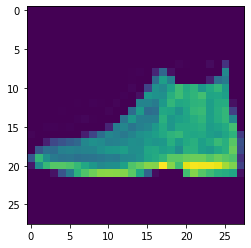

In [26]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


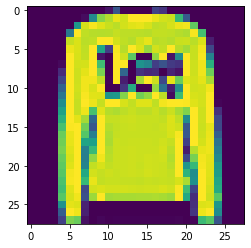

In [27]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


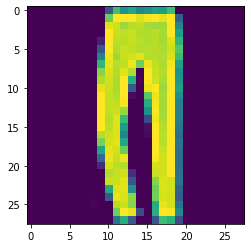

In [28]:
print(plt.imshow(x_test[2]))

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
y_pred = model.predict_classes(x_test)
accuracy_score(y_test, y_pred)

C:\Users\Rolando\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8822

In [31]:
confusion_matrix(y_test, y_pred)

array([[863,   3,  32,  21,   9,   0,  57,   0,  15,   0],
       [  3, 978,   1,  12,   1,   1,   2,   0,   2,   0],
       [ 13,   1, 774,   7, 174,   0,  31,   0,   0,   0],
       [ 22,  12,  19, 874,  53,   0,  15,   0,   5,   0],
       [  1,   1,  45,  16, 924,   0,  11,   0,   2,   0],
       [  1,   0,   0,   1,   0, 953,   0,  28,   6,  11],
       [139,   1, 114,  32, 141,   0, 557,   0,  16,   0],
       [  0,   0,   0,   0,   0,   8,   0, 968,   1,  23],
       [  4,   0,   2,   4,   8,   1,   2,   3, 976,   0],
       [  1,   0,   0,   0,   0,  11,   0,  31,   2, 955]], dtype=int64)

# Using early stopping

In [145]:
del model
keras.backend.clear_session()

In [146]:
input_ = keras.Input(shape = [28, 28])
hidden1 = keras.layers.Dense(300, activation = "relu")(input_)
hidden2 = keras.layers.Dense(300, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
flatten = keras.layers.Flatten()(concat)
output = keras.layers.Dense(10,activation = "softmax")(flatten)
model = keras.models.Model(inputs = [input_], outputs = [output])

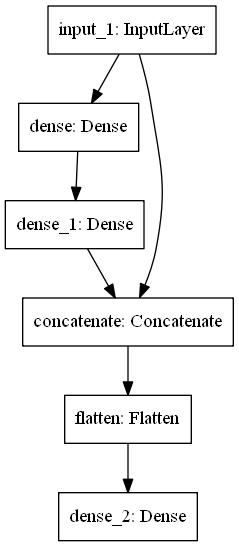

In [147]:
keras.utils.plot_model(model)

In [148]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 28, 300)      8700        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 28, 300)      90300       dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 328)      0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [149]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "SGD",
             metrics = ["accuracy"])

In [150]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop.h5", save_best_only = True)

In [151]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)

In [152]:
history = model.fit(x_train, y_train, epochs = 1000, batch_size = 16,
                    validation_data = (x_valid, y_valid), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/1000
3438/3438 [==============================] - 23s 7ms/step - loss: 0.8285 - accuracy: 0.7311 - val_loss: 0.4713 - val_accuracy: 0.8428
Epoch 2/1000
3438/3438 [==============================] - 23s 7ms/step - loss: 0.4739 - accuracy: 0.8353 - val_loss: 0.4124 - val_accuracy: 0.8620
Epoch 3/1000
3438/3438 [==============================] - 23s 7ms/step - loss: 0.4242 - accuracy: 0.8503 - val_loss: 0.4228 - val_accuracy: 0.8506
Epoch 4/1000
3438/3438 [==============================] - 23s 7ms/step - loss: 0.3979 - accuracy: 0.8599 - val_loss: 0.3756 - val_accuracy: 0.8734
Epoch 5/1000
3438/3438 [==============================] - 23s 7ms/step - loss: 0.3858 - accuracy: 0.8657 - val_loss: 0.3579 - val_accuracy: 0.8748
Epoch 6/1000
3438/3438 [==============================] - 23s 7ms/step - loss: 0.3559 - accuracy: 0.8731 - val_loss: 0.3533 - val_accuracy: 0.8744
Epoch 7/1000
3438/3438 [==============================] - 25s 7ms/step - loss: 0.3494 - accuracy: 0.8786 - val_loss: 0

In [154]:
del model
keras.backend.clear_session()

In [157]:
model = keras.models.load_model("early_stop.h5")

In [158]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3116 - accuracy: 0.8899


[0.3115939795970917, 0.8899000287055969]

In [193]:
#del model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [194]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

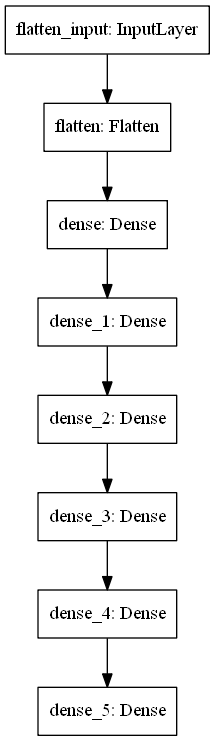

In [195]:
keras.utils.plot_model(model)

In [196]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3

In [197]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop2.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20,
                                                 restore_best_weights = True)

In [198]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "SGD",
             metrics = ["accuracy"])

In [199]:
history = model.fit(x_train, y_train, epochs = 1000, batch_size = 16,
                   validation_data = (x_valid, y_valid), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/1000
3438/3438 [==============================] - 14s 4ms/step - loss: 0.9641 - accuracy: 0.6746 - val_loss: 0.5082 - val_accuracy: 0.8164
Epoch 2/1000
3438/3438 [==============================] - 12s 3ms/step - loss: 0.4431 - accuracy: 0.8396 - val_loss: 0.3656 - val_accuracy: 0.8692
Epoch 3/1000
3438/3438 [==============================] - 12s 3ms/step - loss: 0.3788 - accuracy: 0.8607 - val_loss: 0.4506 - val_accuracy: 0.8244
Epoch 4/1000
3438/3438 [==============================] - 12s 3ms/step - loss: 0.3481 - accuracy: 0.8712 - val_loss: 0.3292 - val_accuracy: 0.8788
Epoch 5/1000
3438/3438 [==============================] - 12s 3ms/step - loss: 0.3321 - accuracy: 0.8781 - val_loss: 0.3237 - val_accuracy: 0.8800
Epoch 6/1000
3438/3438 [==============================] - 12s 3ms/step - loss: 0.2994 - accuracy: 0.8879 - val_loss: 0.3184 - val_accuracy: 0.8842
Epoch 7/1000
3438/3438 [==============================] - 12s 3ms/step - loss: 0.2903 - accuracy: 0.8921 - val_loss: 0

In [200]:
model = keras.models.load_model("early_stop2.h5")

In [201]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8887


[0.3332850933074951, 0.888700008392334]